In [37]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 200)
        self.fc2 = nn.Linear(200, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


net = Net()

In [38]:
net.forward(torch.ones((1,)).to(torch.float32))
params = list(net.parameters())

In [39]:

criterion = nn.MSELoss()

In [40]:
def f(x):
    return x**4 + x**3 + 1

In [41]:
import torch.optim as optim
import numpy as np

optimizer = optim.Adam(net.parameters(), lr=0.001)
loss_values = []

for idx in range(10000):
    kek = np.random.rand(100, 1) * 10 - 5
    target = f(kek)
    
    target = torch.tensor(target).to(torch.float32)
    kek    = torch.tensor(kek).to(torch.float32)

    output = net(kek)

    loss = criterion(output, target)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step() 

    loss_values.append(loss.item())

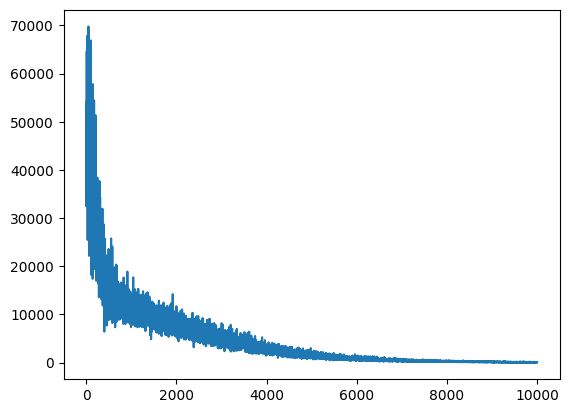

In [42]:
plt.plot(loss_values)

In [43]:
kek = (np.random.rand(100, 1) * 10 - 5)[:, 0]
target = f(kek)

p = kek.argsort()

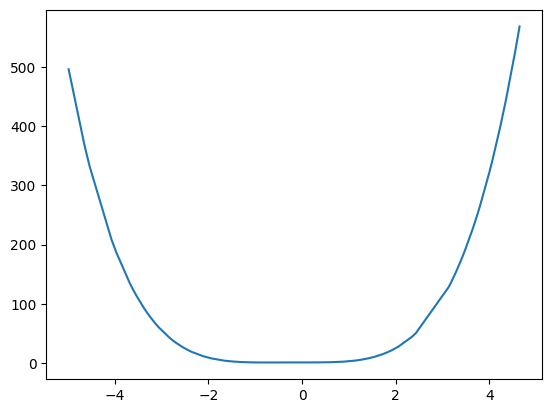

In [44]:
plt.plot(kek[p], target[p])

In [45]:
x = np.linspace(-5, 5, num=200)
y = f(x)

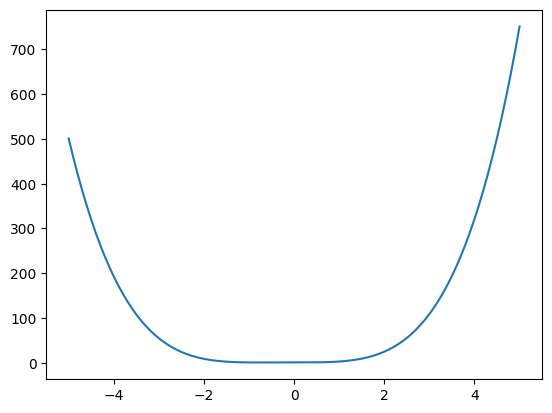

In [46]:


plt.plot(x, y)

In [47]:
x = np.linspace(-5, 5, num=200)
x = torch.tensor(x).to(torch.float32)
x = x.unsqueeze(1)
y = net(x)

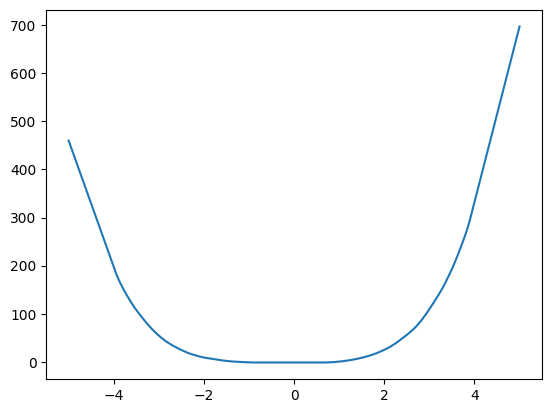

In [48]:
plt.plot(x, y.detach().numpy())